In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [3]:
training_set = dataset_train.iloc[:,1:2].values  # row ,colmuns in range
training_set.shape  
# it has open price column only

(1258, 1)

In [4]:
pd.set_option("display.max_rows",None)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled
# it has open price column only

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
training_set.shape

(1258, 1)

# **RNN is worked Based on only yesturdays data so, we can predict on based on yesturdays data right**
# **we have to check for previous performance of the company,means**
# **atleast u have to observe 1 month or 2 months of data**
# **LSTM has all the previous important information with in it**
# **LSTM always accept 3d input**

In [6]:
pd.set_option("display.max_rows",None)
x_train = []
y_train = []
for i in range(60,1258): # 60 previous days data
    x_train.append(training_set_scaled[i-60:i,0]) # (0 means index = 0)
    y_train.append(training_set_scaled[i,0]) # rows,cols
    # Accessing the element at row 1 (index 0) and column 1 (index 0)
    # adi 2d array kada alaane access chesthaaru anta

x_train,y_train = np.array(x_train),np.array(y_train)

In [7]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [8]:
pd.set_option("display.max_rows",None)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 

# x_train(samples,time_steps,features) / x_train(batch_size, timesteps, units)

# samples = length of df(x_train) / total rows 
# time_steps = columns in x_train / reference data - here 60 days data took / past 1 month or 2 months data
# features = in which column of x_train we should we consider

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
from keras.layers import Dropout
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True))
# dropout lo konni elaaga pothayi kada ani 50 theesukunnaru 
#Definition: When return_sequences is set to True, 
#the LSTM layer returns the output for every time step in the sequence.
#This means that the output shape will be (batch_size, timesteps, units)
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
# observe we wrote Dense instead of LSTM

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 117ms/step - loss: 0.1087
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0069
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0061
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0054
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0062
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0054
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0044
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0054
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0041
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0041
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0042
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0038
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0044
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step

In [13]:
pred = regressor.predict(x_train)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


In [14]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train,pred))
rmse
# rmse should be least alwyas

0.021931763269236418

# Evaluation of Test Data

In [15]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [16]:
real_stock_price = dataset_test.iloc[:,1:2].values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


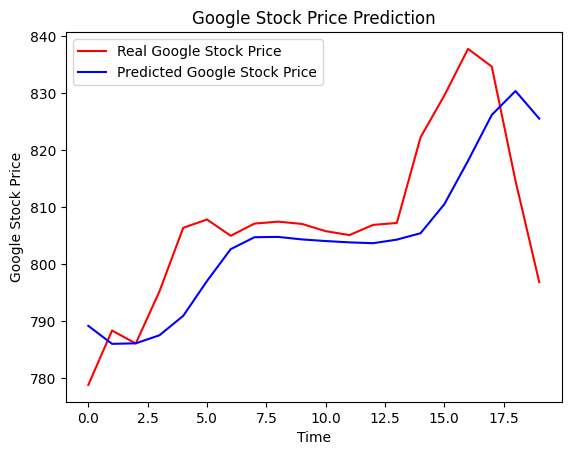

In [17]:
# Getting the real stock price of 2017

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total [len(dataset_total) - len(dataset_test) - 60:].values
# Suppose you are using a model to predict stock prices. 
# You would typically use the past 60 days of stock prices to predict future prices. 
# When you reach the end of your dataset and want to predict future values, 
# you need to include the last 60 days of historical data plus the test period in your input data.

inputs = inputs.reshape(-1,1) # all rows converts into column - 2D

inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):

    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform (predicted_stock_price)
#This transforms the predictions back to the original scale of the data,
#which represents the actual predicted stock prices in their original units (e.g., dollars in this case).


# Visualising the result

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [18]:
inputs = dataset_total [len(dataset_total) - len(dataset_test) - 60:].values


In [19]:
len(dataset_total)

1278

In [20]:
len(dataset_test)

20

In [21]:
1258-60

1198

In [22]:
 1278 - 1198

80

# ARIMA MODEL

In [23]:
df = pd.read_csv("Google_Stock_Price_Train.csv")

In [24]:
index  = df.index
index

RangeIndex(start=0, stop=1258, step=1)

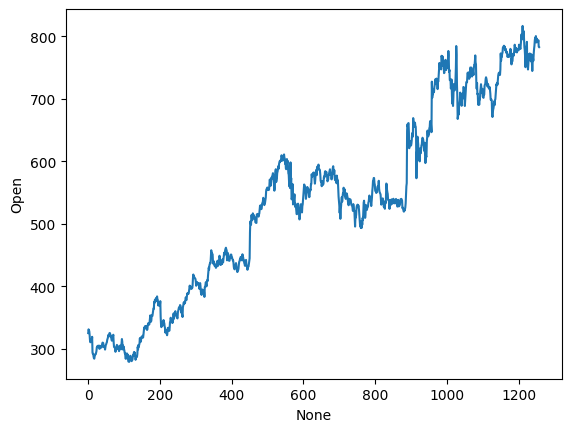

In [25]:
import seaborn as sns
sns.lineplot(x = df.index,y = df["Open"])
plt.show()

In [26]:
rolmean = df["Open"].rolling(window=12).mean()
rolstd = df["Open"].rolling(window=12).std()

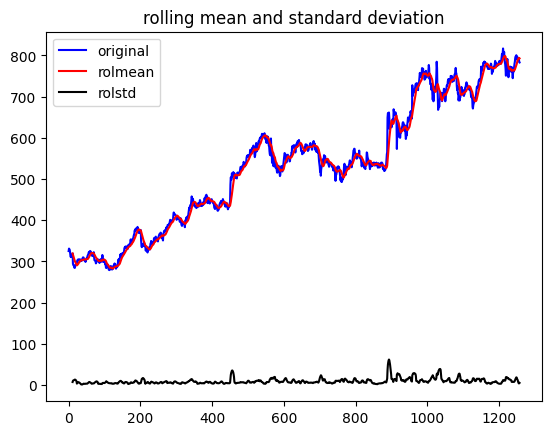

In [27]:
org = plt.plot(df["Open"],label="original",color = "blue")
mean = plt.plot(rolmean,label = "rolmean",color = "red")
std = plt.plot(rolstd,label = "rolstd",c = "black")
plt.title("rolling mean and standard deviation")
#plt.xticks(ticks = df.index)
plt.legend()
plt.show()

# method 2 for checking stationary data or not

In [28]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(df["Open"])
print("p-value  :", adfuller_result[1])

p-value  : 0.8260100940100733


In [29]:
diff = df["Open"]-df["Open"].shift(52)
diff.dropna(inplace = True)

from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(diff)
print("p-value  :", adfuller_result[1])   # p value must be less than 0.05%

p-value  : 0.00029689401288631557


In [30]:
diff.shape

(1206,)

In [31]:
1206 * 0.8

964.8000000000001

In [32]:
1206 - 965 

241

In [33]:
y_train = diff[:965]
y_test = diff[965:]

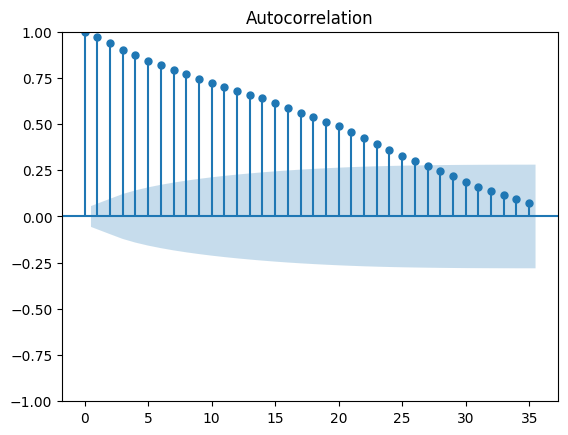

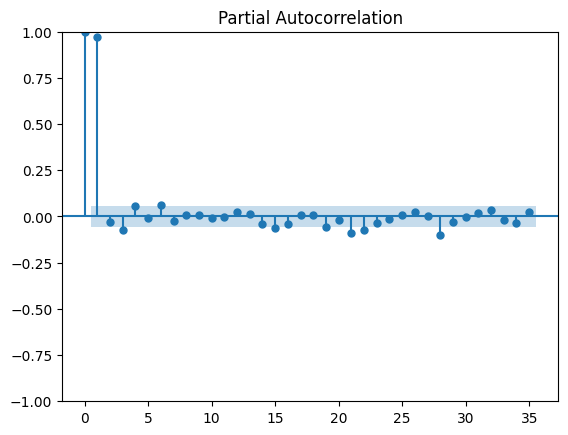

In [34]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm

fig = sm.graphics.tsa.plot_acf(diff,lags = 35)
fig = sm.graphics.tsa.plot_pacf(diff,lags = 35)

In [35]:
import statsmodels

In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

# Example data preparation (Ensure y_train and y_test are defined correctly)
# y_train = pd.Series(...)  # Your training data
# y_test = pd.Series(...)   # Your test data

# Fit ARIMA model
model = ARIMA(y_train, order=(1, 0, 0))  # Example order, adjust as needed
ARIMA_model = model.fit()

# Make predictions for training set
ypred_train = ARIMA_model.predict(start=0, end=len(y_train)-1)  # Use integer indices

# Ensure predictions and actual data have the same index type for evaluation
#ypred_train = pd.Series(ypred_train, index=y_train.index)

# Evaluate training set performance
train_r2 = r2_score(y_train, ypred_train)
print("Train R-squared (ARIMA):", train_r2)

# Make predictions for test set
# The start and end should reflect the range of your test data
# Use the index of test data to specify the prediction range
ypred_test = ARIMA_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)  # Use integer indices

# Ensure predictions and actual data have the same index type for evaluation
#ypred_test = pd.Series(ypred_test, index=y_test.index)

# Evaluate test set performance
test_r2 = r2_score(y_test, ypred_test)
print("Test R-squared (ARIMA):", test_r2)


C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Train R-squared (ARIMA): 0.94601939446805
Test R-squared (ARIMA): 0.06287503977435427


C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\RANGUMUDRI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
